In [1]:
import  mglearn

C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_

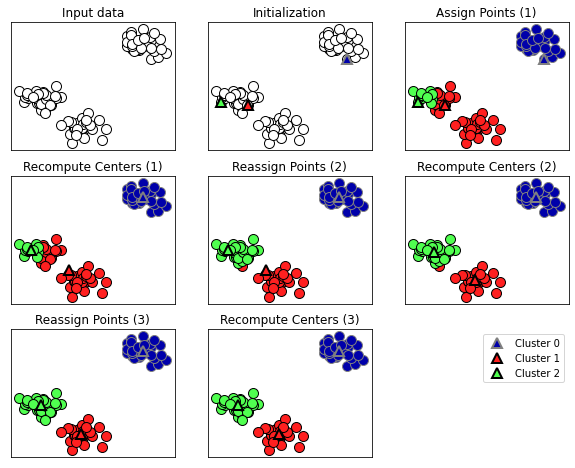

In [3]:
mglearn.plots.plot_kmeans_algorithm();

C:\Users\BİRKAN\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


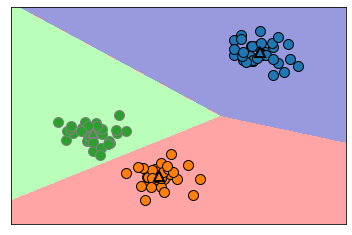

In [4]:
mglearn.plots.plot_kmeans_boundaries()

In [5]:
from sklearn.cluster import KMeans

# Küme merkezlerini görmek için.
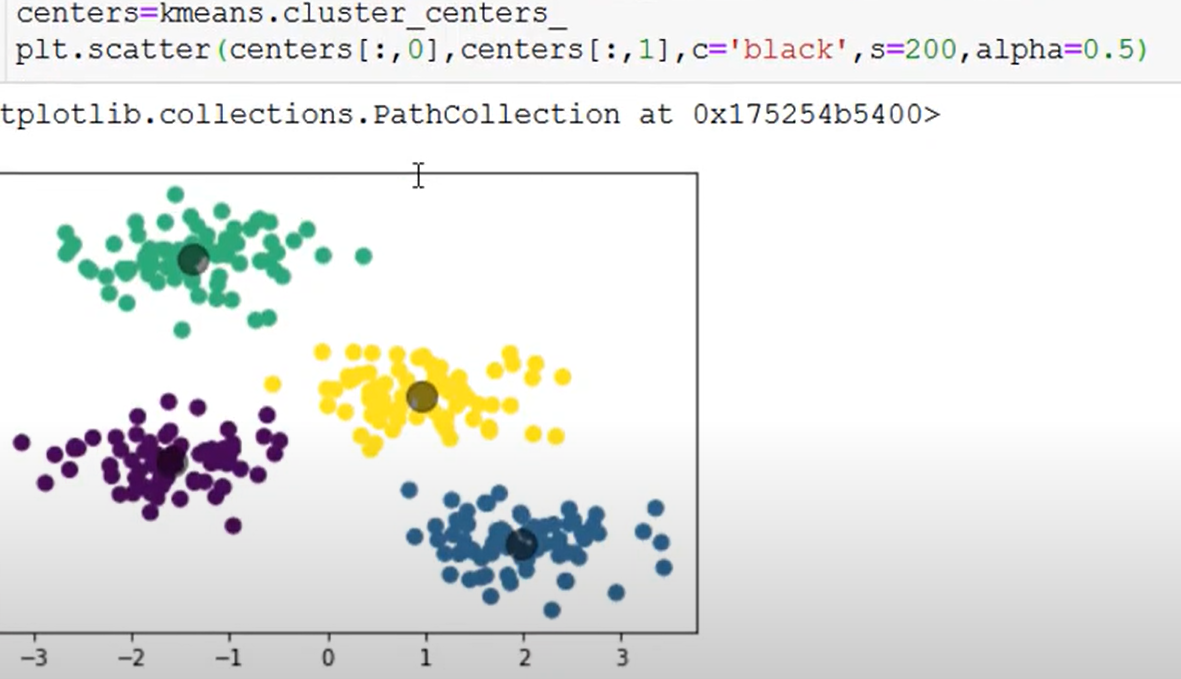 


## karar sınırları linear olmazsa k-means bunun üstesinden gelemez mi ? : 
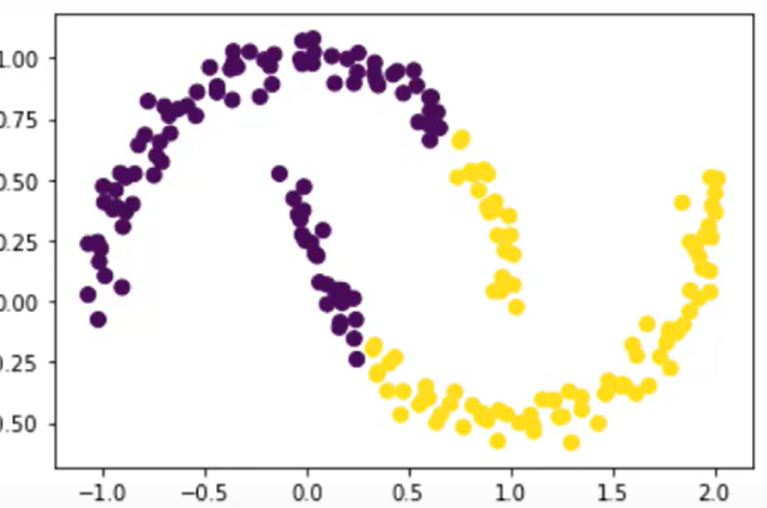

# -----------------> kernel trick gibi bir yol var mı ? 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (8,6)
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [10]:
df = sns.load_dataset("iris")
df.sample(7)

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,versicolor
25,5.0,3.0,1.6,0.2,setosa
104,6.5,3.0,5.8,2.2,virginica
15,5.7,4.4,1.5,0.4,setosa
84,5.4,3.0,4.5,1.5,versicolor
51,6.4,3.2,4.5,1.5,versicolor
61,5.9,3.0,4.2,1.5,versicolor


## clusteringde label yok !

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### k-means distance tabanlıdır scale etmek gerekir. mesela bu data için her şey cm -yakın vs gerek yok scale'e ama genelde böyle gelmeyebilir dikkat.

In [15]:
df.species.value_counts()   # k = 3 ama her zaman bilemeyeceğiz bunu

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

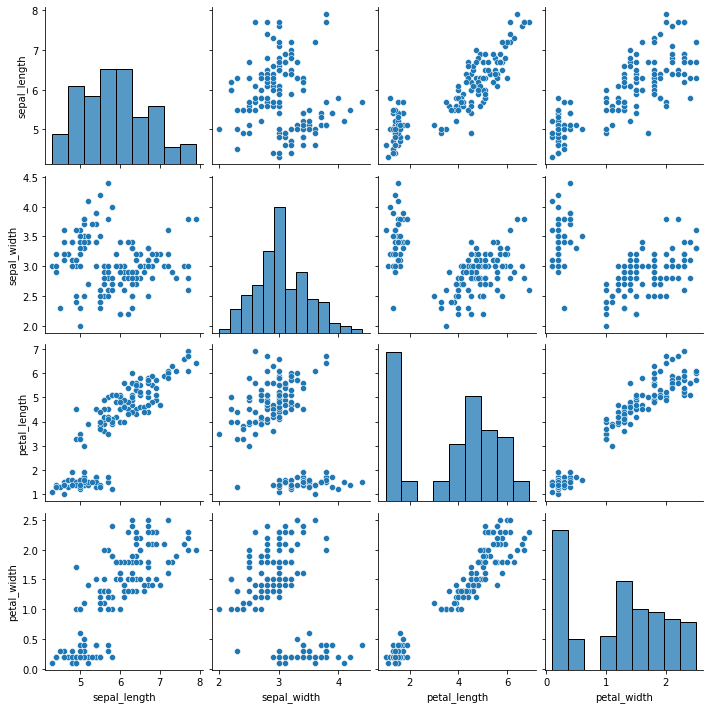

In [12]:
sns.pairplot(df)

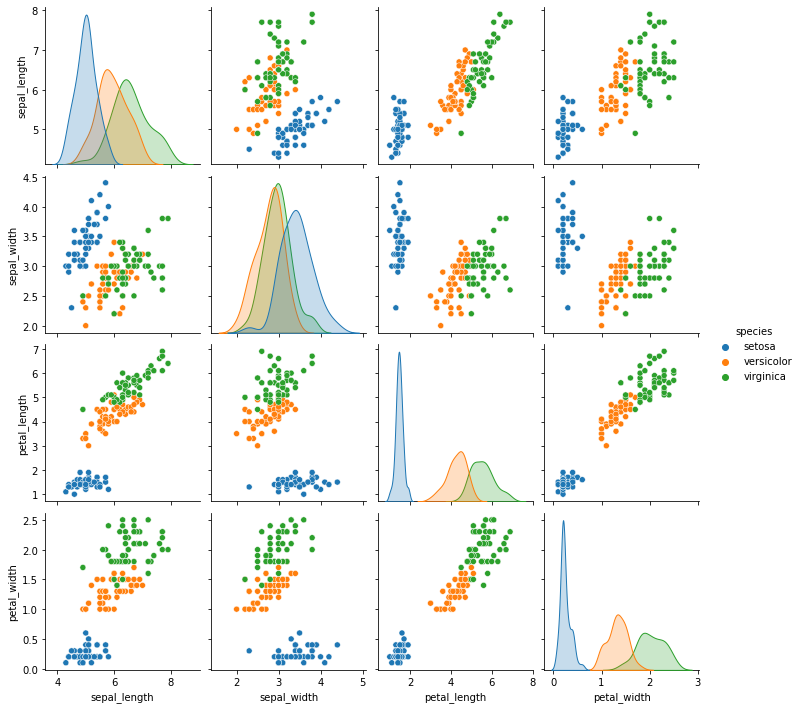

In [14]:
sns.pairplot(df,hue="species")

In [16]:
X = df.drop("species",axis=1)

In [17]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## hopkins test

                clustering tendency:
kümeleme eğilimi: -----> hopkins testi, eğer veriler kümeleme eğilimi içermiyorsa, o zaman herhangi bir kümeleme algoritması tarafından tanımlanan kümeler alakasız olabilir : 0'a yakınsa kümelemeye yatkındır 0.3'Ü geçtikçe hopkins data clusteringe uygun değil uniform bir yapıda deriz.

In [19]:
!pip install pyclustertend

In [20]:
from pyclustertend import hopkins

In [23]:
X.shape

(150, 4)

In [25]:
hopkins(X,X.shape[0])          # 0'a yakın olduğundan clusteringe yatkın.

0.16770311114602776

In [26]:
hopkins(X,150)

0.16046762702606482

## datamı kaç cluster'a ayırmalıyım ? :
## Elbow Method

In [30]:
ssdistance = []
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssdistance.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

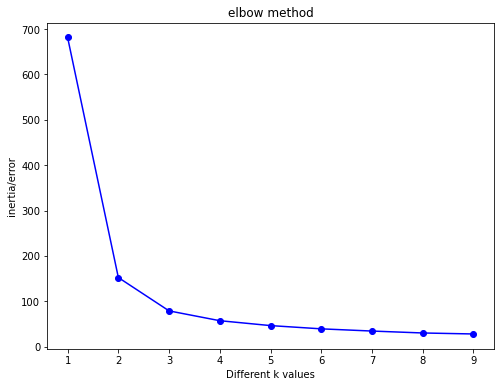

In [34]:
plt.plot(K, ssdistance, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia/error") 
plt.title("elbow method") 

# k'ya 9 verirsem en düşük hatayı alırım ama amacımız : minimum cluster ile maximum ayrımı yapmak.keskin düşüşün bittiği yer bizim için optimum k:3.

In [35]:
model = KMeans(n_clusters=3)
model.fit(X)
model

KMeans(n_clusters=3)

In [36]:
model.inertia_

78.85144142614601

In [38]:
model.labels_                # oluşturduğu clusterlar.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [40]:
clusters = model.labels_

In [44]:
X # bunun sağına yapıştırmak clusters ama bizim label'lı olan originalimiz var. karşılaştırmak için df' e koyalım.

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [45]:
df["predic_clusters"] = clusters
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,predic_clusters
49,5.0,3.3,1.4,0.2,setosa,1
8,4.4,2.9,1.4,0.2,setosa,1
137,6.4,3.1,5.5,1.8,virginica,0
96,5.7,2.9,4.2,1.3,versicolor,2
0,5.1,3.5,1.4,0.2,setosa,1
115,6.4,3.2,5.3,2.3,virginica,0
83,6.0,2.7,5.1,1.6,versicolor,2
15,5.7,4.4,1.5,0.4,setosa,1
22,4.6,3.6,1.0,0.2,setosa,1
112,6.8,3.0,5.5,2.1,virginica,0


In [46]:
df["predic_clusters"].value_counts()

2    62
1    50
0    38
Name: predic_clusters, dtype: int64

# hepsinden 50'şer taneydi bazı yerlerde hata yapmış modelimiz .Daha güzel görelim : 

In [47]:
cross_tab = pd.crosstab(df["predic_clusters"],df["species"])

In [50]:
cross_tab # normalde label'ımız olmayacağından cross_tab yapamayacağız.

species,setosa,versicolor,virginica
predic_clusters,,,
0,0,2,36
1,50,0,0
2,0,48,14


## pairplot'ta da yukarıda böyle çıkabileceğini görebiliriz zaten.

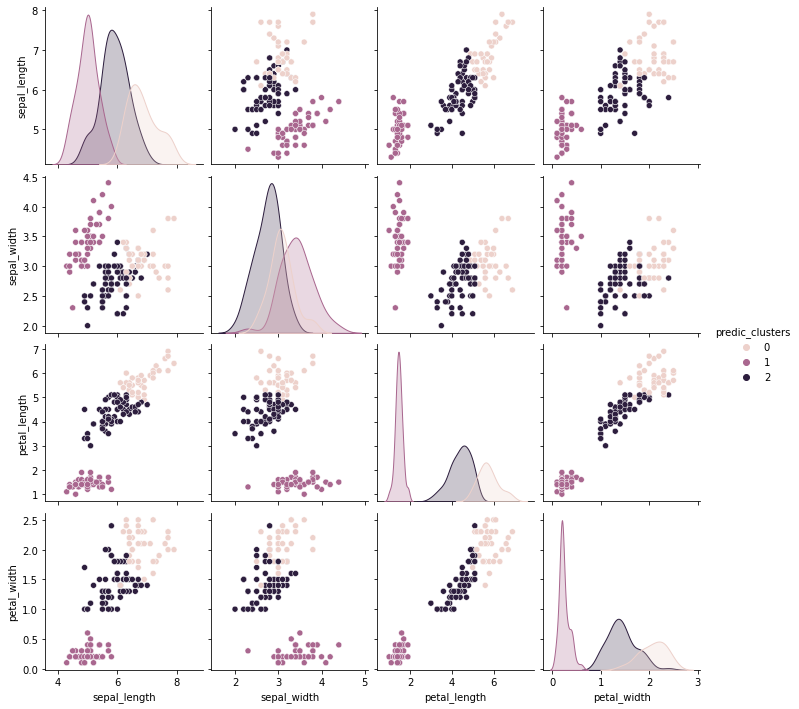

In [57]:
sns.pairplot(df,hue="predic_clusters")

In [39]:
model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

                 # bunlar iterasyon sayısı sonucu merkezler mi her listenin son elamını önemli bizim için ?
                 # buradan da en iyi 1 sınıfını tahmin etmiş diyebilir miyiz ? 

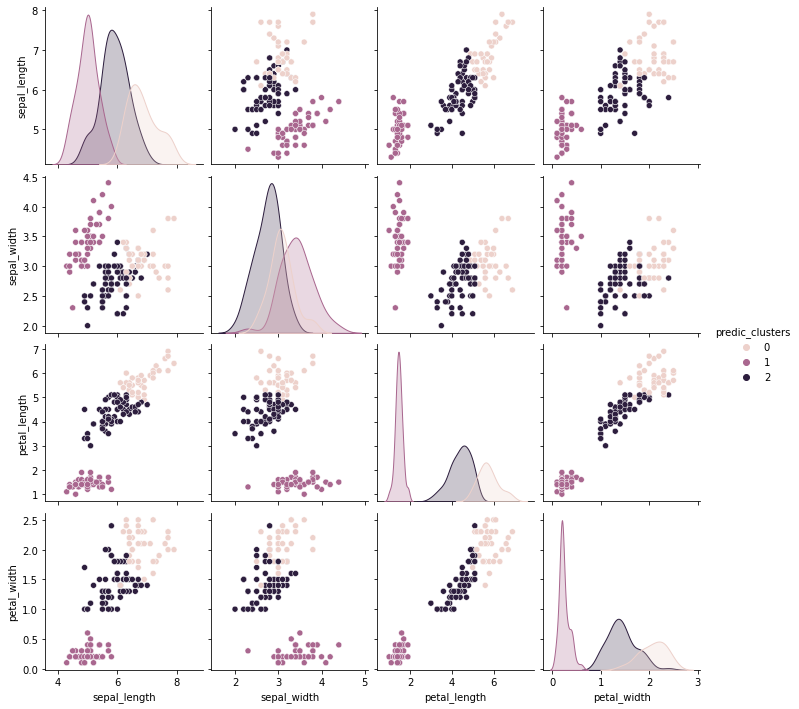

In [60]:
sns.pairplot(df,hue="predic_clusters")